***Implementing the three moving avg strategy***

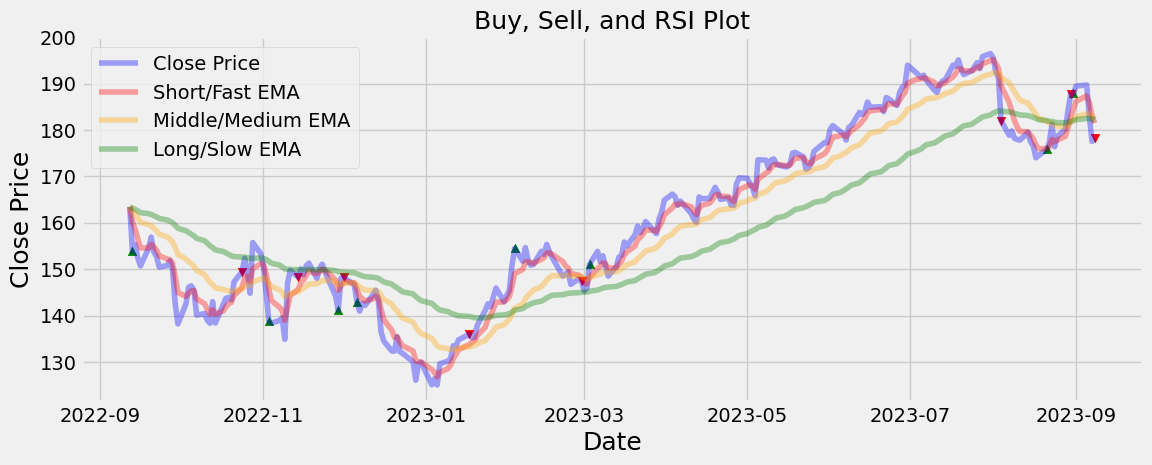

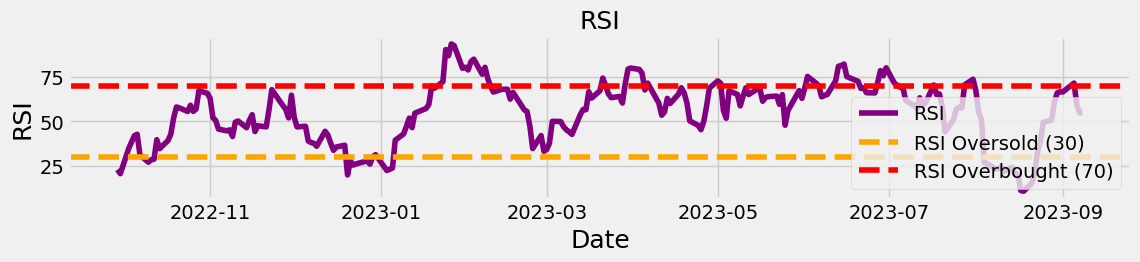

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('AAPL.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Define the functions to calculate EMAs
def shortEma(data):
    return data['Close'].ewm(span=5, adjust=False).mean()

def middleEma(data):
    return data['Close'].ewm(span=21, adjust=False).mean()

def longEma(data):
    return data['Close'].ewm(span=63, adjust=False).mean()

# Calculate the EMAs by calling the functions with your DataFrame as an argument
df['Short'] = shortEma(df)
df['Middle'] = middleEma(df)
df['Long'] = longEma(df)

# Define the buy/sell function (as provided in your previous code)
def buy_sell_function(data):
    buy_list, sell_list = [np.nan] * len(data), [np.nan] * len(data)
    flag_long, flag_short = False, False

    for i in range(0, len(data)):
        if (
            data['Short'][i] > data['Middle'][i] and
            data['Middle'][i] > data['Long'][i] and
            flag_long is False and flag_short is False
        ):
            buy_list[i] = data['Close'][i]
            sell_list[i] = np.nan
            flag_long = True
        elif flag_long and data['Short'][i] < data['Middle'][i]:
            sell_list[i] = data['Close'][i]
            buy_list[i] = np.nan
            flag_long = False
        if (
            data['Short'][i] < data['Middle'][i] and
            data['Middle'][i] < data['Long'][i] and
            flag_long is False and flag_short is False
        ):
            buy_list[i] = data['Close'][i]
            sell_list[i] = np.nan
            flag_short = True
        elif flag_short and data['Short'][i] > data['Middle'][i]:
            sell_list[i] = data['Close'][i]
            buy_list[i] = np.nan
            flag_short = False
    return buy_list, sell_list

df['Buy'], df['Sell'] = buy_sell_function(df)

# Calculate the RSI
n = 14  # RSI period
price_changes = df['Close'].diff()
gain = price_changes.where(price_changes > 0, 0)
loss = -price_changes.where(price_changes < 0, 0)
average_gain = gain.rolling(n).mean()
average_loss = loss.rolling(n).mean()
relative_strength = average_gain / average_loss
rsi = 100 - (100 / (1 + relative_strength))
df['RSI'] = rsi

# Visualize the closing price, EMAs, buy/sell signals, and RSI
plt.figure(figsize=(12.2, 4.5))
plt.title('Buy, Sell, and RSI Plot', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.35)
plt.plot(df['Short'], label='Short/Fast EMA', color='red', alpha=0.35)
plt.plot(df['Middle'], label='Middle/Medium EMA', color='orange', alpha=0.35)
plt.plot(df['Long'], label='Long/Slow EMA', color='green', alpha=0.35)
plt.scatter(df.index, df['Buy'], color='green', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color='red', marker='v', alpha=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()  # Add a legend to the plot

# Create a subplot for the RSI
plt.figure(figsize=(12.2, 2))
plt.title('RSI', fontsize=18)
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(30, linestyle='--', color='orange', label='RSI Oversold (30)')
plt.axhline(70, linestyle='--', color='red', label='RSI Overbought (70)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('RSI', fontsize=18)
plt.legend()  # Add a legend to the RSI plot

plt.show()

# Now you have the EMA values, buy/sell signals, and RSI in your DataFrame


***Strategy for handeling missing data for Buy and Sell we will be using the RSI for obtaining clear signals for buying(RSI > 70 then it gets classified as overbought (1),otherwise 0) and selling (RSI < 30 it, then it gets classified as over 1,otherwise 0)*** 

In [37]:
df['Buy_Signal'] = (df['RSI'] > 70).astype(int)
df['Sell_Signal'] = (df['RSI'] < 30).astype(int)
count = (df['Sell_Signal']==1).sum()
df 

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long,Buy,Sell,RSI,Buy_Signal,Sell_Signal
2022-09-12,2022-09-12,159.589996,164.259995,159.300003,163.429993,162.466171,104956000,163.429993,163.429993,163.429993,NaN,NaN,NaN,0,0
2022-09-13,2022-09-13,159.899994,160.539993,153.369995,153.839996,152.932739,122656600,160.233327,162.558175,163.130306,153.839996,NaN,NaN,0,0
2022-09-14,2022-09-14,154.789993,157.100006,153.610001,155.309998,154.394073,87965400,158.592218,161.899250,162.885921,NaN,NaN,NaN,0,0
2022-09-15,2022-09-15,154.649994,155.240005,151.380005,152.369995,151.471420,90481100,156.518143,161.032954,162.557298,NaN,NaN,NaN,0,0
2022-09-16,2022-09-16,151.210007,151.350006,148.369995,150.699997,149.811264,162278800,154.578761,160.093594,162.186758,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,2023-09-01,189.490005,189.919998,188.279999,189.460007,189.460007,45732600,186.168330,182.863099,182.230607,NaN,NaN,66.447372,0,0
2023-09-05,2023-09-05,188.279999,189.979996,187.610001,189.699997,189.699997,45280000,187.345552,183.484635,182.464026,NaN,NaN,71.393662,1,0
2023-09-06,2023-09-06,188.399994,188.850006,181.470001,182.910004,182.910004,81755800,185.867036,183.432396,182.477963,NaN,NaN,59.177767,0,0
2023-09-07,2023-09-07,175.179993,178.210007,173.539993,177.559998,177.559998,112488800,183.098023,182.898541,182.324276,NaN,NaN,54.769561,0,0
